In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 불러오기

In [5]:
DATA_VERSION = 2

# 데이터 경로 지정
DATA_PATH = "data/"
MINUTE30_PATH = "minute30/"
MINUTE60_PATH = "minute60/"
KAGGLE_PATH = 'kaggle/'
BTC_PATH = "KRW-BTC.csv"
ETH_PATH = "KRW-ETH.csv"
BTC_KAGGLE = "BTC_2012_2021_raw.csv"

In [3]:
# 데이터 불러오기
data_btc30 = pd.read_csv(DATA_PATH + MINUTE30_PATH + BTC_PATH, index_col=0)
data_btc60 = pd.read_csv(DATA_PATH + MINUTE30_PATH + BTC_PATH, index_col=0)
data_eth30 = pd.read_csv(DATA_PATH + MINUTE60_PATH + ETH_PATH, index_col=0)
data_eth60 = pd.read_csv(DATA_PATH + MINUTE60_PATH + ETH_PATH, index_col=0)
ALL_DATA = [data_btc60, data_btc30, data_eth30, data_eth60]

data_btc_kaggle =  pd.read_csv(DATA_PATH + KAGGLE_PATH + BTC_KAGGLE, index_col=0)

In [4]:
btc_df = data_btc_kaggle.copy()
btc_df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.39
2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.555046,2.436653,4.39
2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.654511,2.873305,4.39
2011-12-31 07:55:00,4.39,4.39,4.39,4.39,0.753977,3.309958,4.39
2011-12-31 07:56:00,4.39,4.39,4.39,4.39,0.853442,3.746611,4.39


# Feature Engineer

## 이동평균선

* 단기 5분 30분 60분 1일 단위로는 최근 데이터에 가중치를 둔 **지수이동평균**을 적용
* 장기 3일 7일 30일 90일 180일 단위로는 전체적인 데이터의 이동을 나타네는 **단순이동평균**을 적용

In [5]:
ema_col_name = ['ema5m', 'ema30m', 'ema60m', 'ema1d', 'ema3d']
sma_col_name = ['sma7d', 'sma30d', 'sma90d', 'sma180d']
ema_mins = [5, 30, 60, 1440, 1440*3]
sma_mins = [1440*7, 1440*30, 1440*90, 1440*180]
ema_zip = zip(ema_col_name, ema_mins)
sma_zip = zip(sma_col_name, sma_mins)

In [6]:
def sma_x(data, min_=1440*7):
    '''단순이동평균 함수'''   
    return data['Close'].rolling(min_).mean()

In [7]:
def ema_x(data, min_=5):
    '''지수이동평균 함수'''
    return data['Close'].ewm(min_).mean()

In [8]:
for name, m in ema_zip:
    btc_df[name] = ema_x(btc_df, m)

for name, m in sma_zip:
    btc_df[name] = sma_x(btc_df, m)
btc_df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,ema5m,ema30m,ema60m,ema1d,ema3d,sma7d,sma30d,sma90d,sma180d
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.39,4.39,4.39,4.39,4.39,4.39,NaN,NaN,NaN,NaN
2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.555046,2.436653,4.39,4.39,4.39,4.39,4.39,4.39,NaN,NaN,NaN,NaN
2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.654511,2.873305,4.39,4.39,4.39,4.39,4.39,4.39,NaN,NaN,NaN,NaN
2011-12-31 07:55:00,4.39,4.39,4.39,4.39,0.753977,3.309958,4.39,4.39,4.39,4.39,4.39,4.39,NaN,NaN,NaN,NaN
2011-12-31 07:56:00,4.39,4.39,4.39,4.39,0.853442,3.746611,4.39,4.39,4.39,4.39,4.39,4.39,NaN,NaN,NaN,NaN


In [9]:
# 앞부분 연속 데이터가 없어 결측치 발생
# 초기에는 변화가 크지 않으므로 뒤에서부터 채움
btc_df.interpolate(limit_direction="backward", inplace=True)
btc_df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,ema5m,ema30m,ema60m,ema1d,ema3d,sma7d,sma30d,sma90d,sma180d
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.39,4.39,4.39,4.39,4.39,4.39,5.432311,6.20297,5.473687,5.378391
2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.555046,2.436653,4.39,4.39,4.39,4.39,4.39,4.39,5.432311,6.20297,5.473687,5.378391
2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.654511,2.873305,4.39,4.39,4.39,4.39,4.39,4.39,5.432311,6.20297,5.473687,5.378391
2011-12-31 07:55:00,4.39,4.39,4.39,4.39,0.753977,3.309958,4.39,4.39,4.39,4.39,4.39,4.39,5.432311,6.20297,5.473687,5.378391
2011-12-31 07:56:00,4.39,4.39,4.39,4.39,0.853442,3.746611,4.39,4.39,4.39,4.39,4.39,4.39,5.432311,6.20297,5.473687,5.378391


## MVRV z-score

* 데이터의 연산량이 매우 많아 multiprocessing을 이용하여 병렬 처리 진행

In [21]:
import multiprocessing as mp
from multiprocessing import Pool
import os

num_cores = mp.cpu_count() # cpu의 코어 수를 반환
print("CPU 코어 수: ", num_cores)

CPU 코어 수:  16


In [23]:
def MVRV_z_score(idx):
#     if idx % 10 == 0:
#         print("진행률 {:.2f}% {:10d}/{}\r".format(idx/l*100, idx, l), end='')
#     print(idx)
        
    temp = btc_df['Close'].loc[:idx]
#     print(temp)
    mean = temp.mean()
    std = temp.std()
    res = (btc_df['Close'].loc[idx] - mean) / std
    
    return res

In [19]:
def MVRV_z_score_parall(data):
    print('PID :', os.getpid())  # 병렬처리 확인
    data['z-score'] = data.apply(lambda x: MVRV_z_score(x.name), axis=1)
    
    return data

In [162]:
def parallel_dataframe(df, func):
    df_split = np.array_split(df, num_cores)
    pool = Pool(num_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

In [ ]:
df = parallel_dataframe(temp_df, MVRV_z_score_parall)

PID : 4593
PID : 4594


<ipython-input-69-85944b7428a1>:10: RuntimeWarning: invalid value encountered in double_scalars
  res = (temp_df['Close'].loc[idx] - mean) / std


PID : 4595
PID : 4596
PID : 4597
PID : 4598
PID : 4622
PID : 4625


In [15]:
# 학습 저장 or 계산된 데이터 불러오기
# df.to_csv("BTC_2012_2021_v2.csv")
df = pd.read_csv("data/z-score.csv", index_col=0)

In [19]:
btc_df['Z-score'] = df['z-score']
btc_df

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,ema5m,ema30m,ema60m,ema1d,ema3d,sma7d,sma30d,sma90d,sma180d,Z-score
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,4.390000,4.390000,4.390000,4.390000,4.390000,5.432311,6.202970,5.473687,5.378391,NaN
2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.555046,2.436653,4.390000,4.390000,4.390000,4.390000,4.390000,4.390000,5.432311,6.202970,5.473687,5.378391,NaN
2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.654511,2.873305,4.390000,4.390000,4.390000,4.390000,4.390000,4.390000,5.432311,6.202970,5.473687,5.378391,NaN
2011-12-31 07:55:00,4.39,4.39,4.39,4.39,0.753977,3.309958,4.390000,4.390000,4.390000,4.390000,4.390000,4.390000,5.432311,6.202970,5.473687,5.378391,NaN
2011-12-31 07:56:00,4.39,4.39,4.39,4.39,0.853442,3.746611,4.390000,4.390000,4.390000,4.390000,4.390000,4.390000,5.432311,6.202970,5.473687,5.378391,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,58689.266317,58683.004432,58703.025685,57747.470376,56392.193025,55255.074402,54502.290462,44724.801534,30691.993501,6.634937
2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,58688.690264,58683.094934,58702.743461,57748.121549,56392.723832,55255.498022,54502.604789,44725.031694,30692.178959,6.634883
2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,58694.548554,58684.409291,58703.089306,57748.798661,56393.263317,55255.916752,54502.918730,44725.261949,30692.364550,6.639516
2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,58705.555461,58686.866733,58704.031940,57749.500806,56393.811183,55256.353163,54503.231684,44725.492499,30692.550267,6.643992


In [20]:
# 앞부분 연속 데이터가 없어 결측치 발생
# 초기에는 변화가 크지 않으므로 뒤에서부터 채움
btc_df.interpolate(limit_direction="backward", inplace=True)
btc_df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,ema5m,ema30m,ema60m,ema1d,ema3d,sma7d,sma30d,sma90d,sma180d,Z-score
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.39,4.39,4.39,4.39,4.39,4.39,5.432311,6.20297,5.473687,5.378391,0.983739
2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.555046,2.436653,4.39,4.39,4.39,4.39,4.39,4.39,5.432311,6.20297,5.473687,5.378391,0.983739
2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.654511,2.873305,4.39,4.39,4.39,4.39,4.39,4.39,5.432311,6.20297,5.473687,5.378391,0.983739
2011-12-31 07:55:00,4.39,4.39,4.39,4.39,0.753977,3.309958,4.39,4.39,4.39,4.39,4.39,4.39,5.432311,6.20297,5.473687,5.378391,0.983739
2011-12-31 07:56:00,4.39,4.39,4.39,4.39,0.853442,3.746611,4.39,4.39,4.39,4.39,4.39,4.39,5.432311,6.20297,5.473687,5.378391,0.983739


In [21]:
btc_df.to_csv("data/BTC_2012_2021_v2.csv")

## 외부 데이터 추가

In [117]:
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [118]:
# 데이터 경로 지정
DATA_PATH = "data/external_data/"
DJIA = 'DJIA.csv'                     # 다우존스 지수
HASH_RATE = "hash-rate.csv"           # 해쉬레이트 
MINING_DIF = "Mining_difficulty.csv"  # 채굴 난이도
WTI_OIL = "WTI_oil.csv"               # WTI 유가

### 데이터 타입 및 index 재설정

In [119]:
djia = pd.read_csv(DATA_PATH + DJIA)
hash_rate = pd.read_csv(DATA_PATH + HASH_RATE)
mining_dif = pd.read_csv(DATA_PATH + MINING_DIF)
wti_oil = pd.read_csv(DATA_PATH + WTI_OIL)

In [120]:
display_side_by_side(djia.head(), hash_rate.head(), mining_dif.head(), wti_oil.head())
display_side_by_side(djia.tail(), hash_rate.tail(), mining_dif.tail(), wti_oil.tail())

날짜 
 종가 
 오픈 
 고가 
 저가 
 거래량 
 변동 % 
 
 
 
 
 0 
 2021년 03월 31일 
 32,981.55 
 33,116.04 
 33,173.77 
 32,980.57 
 418.64M 
 -0.26% 
 
 
 1 
 2021년 03월 30일 
 33,066.96 
 33,127.88 
 33,170.93 
 32,988.92 
 309.57M 
 -0.31% 
 
 
 2 
 2021년 03월 29일 
 33,171.37 
 33,087.55 
 33,259.00 
 32,905.13 
 351.61M 
 0.30% 
 
 
 3 
 2021년 03월 26일 
 33,072.88 
 32,681.07 
 33,098.83 
 32,681.07 
 383.45M 
 1.39% 
 
 
 4 
 2021년 03월 25일 
 32,619.48 
 32,346.81 
 32,672.69 
 32,071.41 
 413.49M 
 0.62% 
 
 
 
 
 
 
 Timestamp 
 hash-rate 
 
 
 
 
 0 
 2009-01-03 00:00:00 
 4.971027e-08 
 
 
 1 
 2009-01-06 00:00:00 
 0.000000e+00 
 
 
 2 
 2009-01-09 00:00:00 
 6.959438e-07 
 
 
 3 
 2009-01-12 00:00:00 
 4.424214e-06 
 
 
 4 
 2009-01-15 00:00:00 
 6.313204e-06 
 
 
 
 
 
 
 Timestamp 
 difficulty 
 
 
 
 
 0 
 2009-01-03 00:00:00 
 1.0 
 
 
 1 
 2009-01-06 00:00:00 
 0.0 
 
 
 2 
 2009-01-09 00:00:00 
 1.0 
 
 
 3 
 2009-01-12 00:00:00 
 1.0 
 
 
 4 
 2009-01-15 00:00:00 
 1.0 
 
 
 
 
 
 
 날짜 
 종가 
 오픈 
 고가 
 저가 
 거래량 
 변동 % 
 
 
 
 
 0 
 2021년 03월 31일 
 59.16 
 60.45 
 61.17 
 58.85 
 414.16K 
 -2.30% 
 
 
 1 
 2021년 03월 30일 
 60.55 
 61.96 
 62.27 
 59.94 
 388.19K 
 -1.64% 
 
 
 2 
 2021년 03월 29일 
 61.56 
 60.93 
 61.77 
 59.41 
 449.36K 
 0.97% 
 
 
 3 
 2021년 03월 26일 
 60.97 
 58.48 
 61.36 
 58.32 
 472.00K 
 4.12% 
 
 
 4 
 2021년 03월 25일 
 58.56 
 60.80 
 60.86 
 57.44 
 580.11K 
 -4.28%

날짜 
 종가 
 오픈 
 고가 
 저가 
 거래량 
 변동 % 
 
 
 
 
 2321 
 2012년 01월 09일 
 12,392.69 
 12,359.31 
 12,409.08 
 12,333.85 
 122.20M 
 0.27% 
 
 
 2322 
 2012년 01월 06일 
 12,359.92 
 12,407.45 
 12,415.24 
 12,332.41 
 131.12M 
 -0.45% 
 
 
 2323 
 2012년 01월 05일 
 12,415.70 
 12,418.42 
 12,435.98 
 12,283.90 
 158.44M 
 -0.02% 
 
 
 2324 
 2012년 01월 04일 
 12,418.42 
 12,392.46 
 12,430.00 
 12,337.25 
 145.13M 
 0.17% 
 
 
 2325 
 2012년 01월 03일 
 12,397.38 
 12,221.19 
 12,479.65 
 12,221.19 
 152.56M 
 1.47% 
 
 
 
 
 
 
 Timestamp 
 hash-rate 
 
 
 
 
 1522 
 2021-07-05 00:00:00 
 9.424666e+07 
 
 
 1523 
 2021-07-08 00:00:00 
 9.924459e+07 
 
 
 1524 
 2021-07-11 00:00:00 
 8.924873e+07 
 
 
 1525 
 2021-07-14 00:00:00 
 1.213783e+08 
 
 
 1526 
 2021-07-17 00:00:00 
 1.019976e+08 
 
 
 
 
 
 
 Timestamp 
 difficulty 
 
 
 
 
 1522 
 2021-07-05 00:00:00 
 1.436303e+13 
 
 
 1523 
 2021-07-08 00:00:00 
 1.436303e+13 
 
 
 1524 
 2021-07-11 00:00:00 
 1.436303e+13 
 
 
 1525 
 2021-07-14 00:00:00 
 1.436303e+13 
 
 
 1526 
 2021-07-17 00:00:00 
 1.434854e+13 
 
 
 
 
 
 
 날짜 
 종가 
 오픈 
 고가 
 저가 
 거래량 
 변동 % 
 
 
 
 
 2411 
 2012년 01월 09일 
 101.31 
 101.92 
 102.15 
 100.10 
 311.87K 
 -0.25% 
 
 
 2412 
 2012년 01월 06일 
 101.56 
 101.35 
 102.80 
 100.88 
 290.46K 
 -0.25% 
 
 
 2413 
 2012년 01월 05일 
 101.81 
 103.29 
 103.73 
 101.30 
 295.62K 
 -1.37% 
 
 
 2414 
 2012년 01월 04일 
 103.22 
 102.99 
 103.74 
 101.88 
 271.71K 
 0.25% 
 
 
 2415 
 2012년 01월 03일 
 102.96 
 99.70 
 103.18 
 99.65 
 275.48K 
 4.18%

In [121]:
# 한글로 적힌 날짜 데이터 변환
def str2date(string):
    ymd = string.split()
    y = ymd[0][:4]
    m = ymd[1][:2]
    d = ymd[2][:2]
    return y+'-'+m+'-'+d

In [122]:
# 날짜 데이터형식을 변환
djia['날짜'] = djia['날짜'].apply(lambda x: str2date(x))
wti_oil['날짜'] = wti_oil['날짜'].apply(lambda x: str2date(x))
hash_rate['Timestamp'] = pd.to_datetime(hash_rate['Timestamp'])
mining_dif['Timestamp'] = pd.to_datetime(mining_dif['Timestamp'])

# 날짜 데이터로 인덱스설정
djia.set_index('날짜', inplace=True)
hash_rate.set_index('Timestamp', inplace=True)
mining_dif.set_index('Timestamp', inplace=True)
wti_oil.set_index('날짜', inplace=True)

# 인덱스 정렬
djia.sort_index(inplace=True)
hash_rate.sort_index(inplace=True)
mining_dif.sort_index(inplace=True)
wti_oil.sort_index(inplace=True)

# 결과 출력
display_side_by_side(djia.head(), hash_rate.head(), mining_dif.head(), wti_oil.head())
display_side_by_side(djia.tail(), hash_rate.tail(), mining_dif.tail(), wti_oil.tail())

종가 
 오픈 
 고가 
 저가 
 거래량 
 변동 % 
 
 
 날짜 
 
 
 
 
 
 
 
 
 
 
 2012-01-03 
 12,397.38 
 12,221.19 
 12,479.65 
 12,221.19 
 152.56M 
 1.47% 
 
 
 2012-01-04 
 12,418.42 
 12,392.46 
 12,430.00 
 12,337.25 
 145.13M 
 0.17% 
 
 
 2012-01-05 
 12,415.70 
 12,418.42 
 12,435.98 
 12,283.90 
 158.44M 
 -0.02% 
 
 
 2012-01-06 
 12,359.92 
 12,407.45 
 12,415.24 
 12,332.41 
 131.12M 
 -0.45% 
 
 
 2012-01-09 
 12,392.69 
 12,359.31 
 12,409.08 
 12,333.85 
 122.20M 
 0.27% 
 
 
 
 
 
 
 hash-rate 
 
 
 Timestamp 
 
 
 
 
 
 2009-01-03 
 4.971027e-08 
 
 
 2009-01-06 
 0.000000e+00 
 
 
 2009-01-09 
 6.959438e-07 
 
 
 2009-01-12 
 4.424214e-06 
 
 
 2009-01-15 
 6.313204e-06 
 
 
 
 
 
 
 difficulty 
 
 
 Timestamp 
 
 
 
 
 
 2009-01-03 
 1.0 
 
 
 2009-01-06 
 0.0 
 
 
 2009-01-09 
 1.0 
 
 
 2009-01-12 
 1.0 
 
 
 2009-01-15 
 1.0 
 
 
 
 
 
 
 종가 
 오픈 
 고가 
 저가 
 거래량 
 변동 % 
 
 
 날짜 
 
 
 
 
 
 
 
 
 
 
 2012-01-03 
 102.96 
 99.70 
 103.18 
 99.65 
 275.48K 
 4.18% 
 
 
 2012-01-04 
 103.22 
 102.99 
 103.74 
 101.88 
 271.71K 
 0.25% 
 
 
 2012-01-05 
 101.81 
 103.29 
 103.73 
 101.30 
 295.62K 
 -1.37% 
 
 
 2012-01-06 
 101.56 
 101.35 
 102.80 
 100.88 
 290.46K 
 -0.25% 
 
 
 2012-01-09 
 101.31 
 101.92 
 102.15 
 100.10 
 311.87K 
 -0.25%

종가 
 오픈 
 고가 
 저가 
 거래량 
 변동 % 
 
 
 날짜 
 
 
 
 
 
 
 
 
 
 
 2021-03-25 
 32,619.48 
 32,346.81 
 32,672.69 
 32,071.41 
 413.49M 
 0.62% 
 
 
 2021-03-26 
 33,072.88 
 32,681.07 
 33,098.83 
 32,681.07 
 383.45M 
 1.39% 
 
 
 2021-03-29 
 33,171.37 
 33,087.55 
 33,259.00 
 32,905.13 
 351.61M 
 0.30% 
 
 
 2021-03-30 
 33,066.96 
 33,127.88 
 33,170.93 
 32,988.92 
 309.57M 
 -0.31% 
 
 
 2021-03-31 
 32,981.55 
 33,116.04 
 33,173.77 
 32,980.57 
 418.64M 
 -0.26% 
 
 
 
 
 
 
 hash-rate 
 
 
 Timestamp 
 
 
 
 
 
 2021-07-05 
 9.424666e+07 
 
 
 2021-07-08 
 9.924459e+07 
 
 
 2021-07-11 
 8.924873e+07 
 
 
 2021-07-14 
 1.213783e+08 
 
 
 2021-07-17 
 1.019976e+08 
 
 
 
 
 
 
 difficulty 
 
 
 Timestamp 
 
 
 
 
 
 2021-07-05 
 1.436303e+13 
 
 
 2021-07-08 
 1.436303e+13 
 
 
 2021-07-11 
 1.436303e+13 
 
 
 2021-07-14 
 1.436303e+13 
 
 
 2021-07-17 
 1.434854e+13 
 
 
 
 
 
 
 종가 
 오픈 
 고가 
 저가 
 거래량 
 변동 % 
 
 
 날짜 
 
 
 
 
 
 
 
 
 
 
 2021-03-25 
 58.56 
 60.80 
 60.86 
 57.44 
 580.11K 
 -4.28% 
 
 
 2021-03-26 
 60.97 
 58.48 
 61.36 
 58.32 
 472.00K 
 4.12% 
 
 
 2021-03-29 
 61.56 
 60.93 
 61.77 
 59.41 
 449.36K 
 0.97% 
 
 
 2021-03-30 
 60.55 
 61.96 
 62.27 
 59.94 
 388.19K 
 -1.64% 
 
 
 2021-03-31 
 59.16 
 60.45 
 61.17 
 58.85 
 414.16K 
 -2.30%

# 데이터 시각화

In [14]:
btc_df = pd.read_csv(DATA_PATH + KAGGLE_PATH + 'BTC_2012_2021_v2_backup.csv', index_col=0)

In [15]:
btc_df

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,ema5m,ema30m,ema60m,ema1d,ema3d,sma7d,sma30d,sma90d,sma180d,Z-score
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,4.390000,4.390000,4.390000,4.390000,4.390000,5.432311,6.202970,5.473687,5.378391,0.983739
2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.555046,2.436653,4.390000,4.390000,4.390000,4.390000,4.390000,4.390000,5.432311,6.202970,5.473687,5.378391,0.983739
2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.654511,2.873305,4.390000,4.390000,4.390000,4.390000,4.390000,4.390000,5.432311,6.202970,5.473687,5.378391,0.983739
2011-12-31 07:55:00,4.39,4.39,4.39,4.39,0.753977,3.309958,4.390000,4.390000,4.390000,4.390000,4.390000,4.390000,5.432311,6.202970,5.473687,5.378391,0.983739
2011-12-31 07:56:00,4.39,4.39,4.39,4.39,0.853442,3.746611,4.390000,4.390000,4.390000,4.390000,4.390000,4.390000,5.432311,6.202970,5.473687,5.378391,0.983739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,58689.266317,58683.004432,58703.025685,57747.470376,56392.193025,55255.074402,54502.290462,44724.801534,30691.993501,6.634937
2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,58688.690264,58683.094934,58702.743461,57748.121549,56392.723832,55255.498022,54502.604789,44725.031694,30692.178959,6.634883
2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,58694.548554,58684.409291,58703.089306,57748.798661,56393.263317,55255.916752,54502.918730,44725.261949,30692.364550,6.639516
2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,58705.555461,58686.866733,58704.031940,57749.500806,56393.811183,55256.353163,54503.231684,44725.492499,30692.550267,6.643992


## 비트코인 전체 그래프(y축 log스케일)

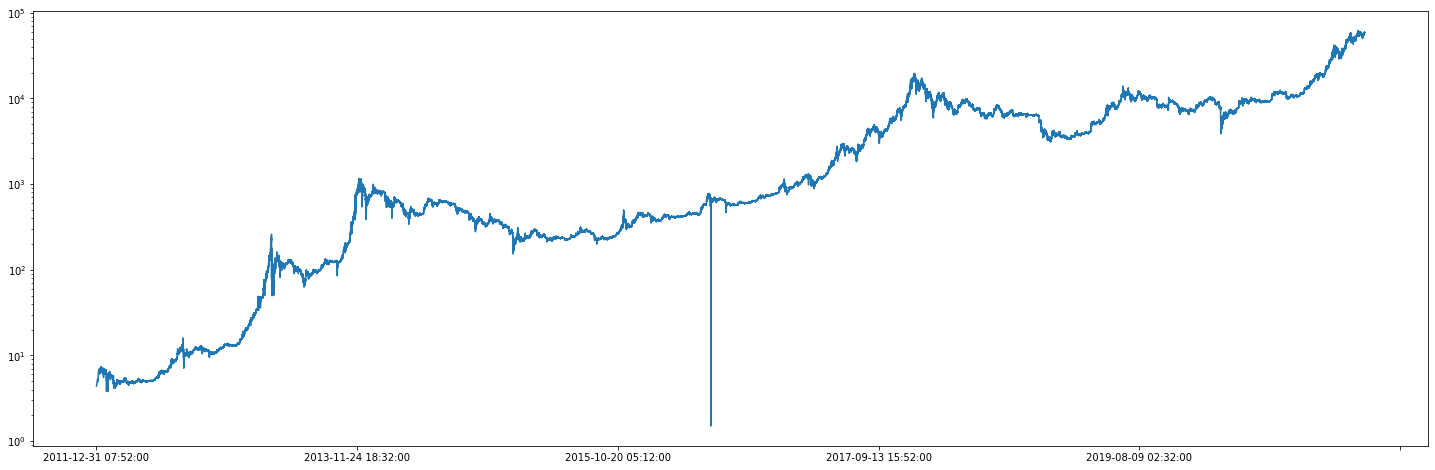

In [16]:
plt.figure(figsize=(25,8))
ax = btc_df['Close'].plot()
ax.set_yscale("log")

### 중간에 이상치 수정

In [17]:
btc_df.loc['2016-06-23 12:35:00':'2016-06-23 12:37:00']
btc_df.loc['2016-06-23 12:36:00']['Low'] = 586.71
btc_df.loc['2016-06-23 12:36:00']['Close'] = 588.56
btc_df.loc['2016-06-23 12:35:00':'2016-06-23 12:37:00']

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,ema5m,ema30m,ema60m,ema1d,ema3d,sma7d,sma30d,sma90d,sma180d,Z-score
2016-06-23 12:35:00,590.40,590.40,586.71,588.56,44.446616,26130.846632,587.915323,590.652117,591.085825,590.684139,631.905459,678.903637,713.836230,599.420448,492.078117,450.999615,1.369911
2016-06-23 12:36:00,586.80,588.53,586.71,588.56,54.486076,29003.437329,532.309155,492.460097,572.066928,581.025383,631.467981,678.746867,713.763958,599.410179,492.074917,450.998003,-1.153405
2016-06-23 12:37:00,585.17,587.57,584.06,584.06,20.770370,12151.069547,585.019395,507.726748,572.453801,581.075131,631.435082,678.724954,713.749103,599.413389,492.076212,450.998639,1.350569


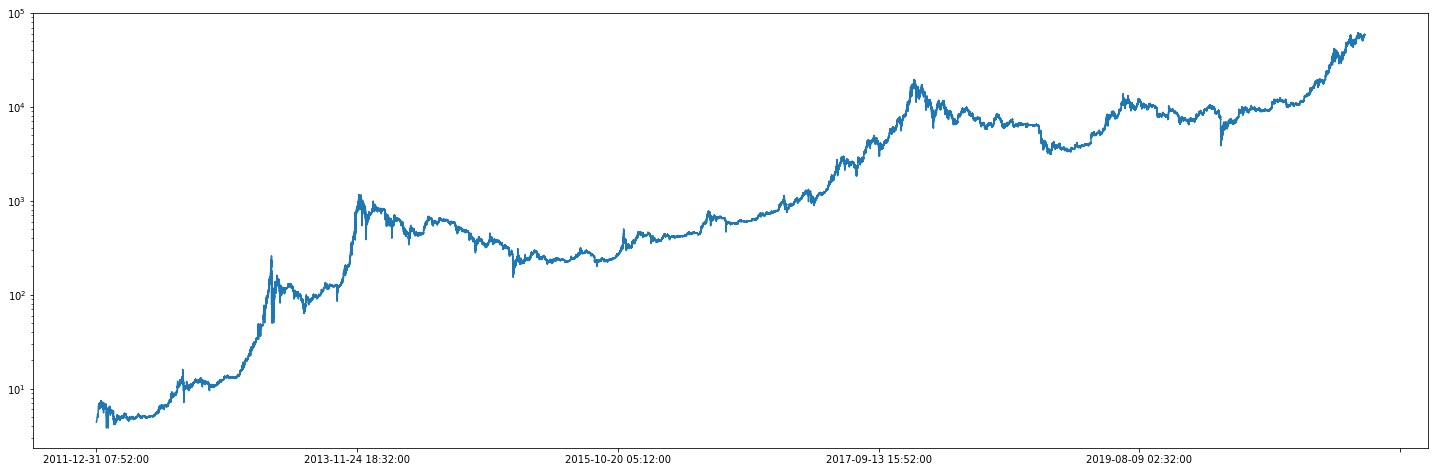

In [18]:
plt.figure(figsize=(25,8))
ax = btc_df['Close'].plot()
ax.set_yscale("log")

## MVRV z-score 그래프

<AxesSubplot:>

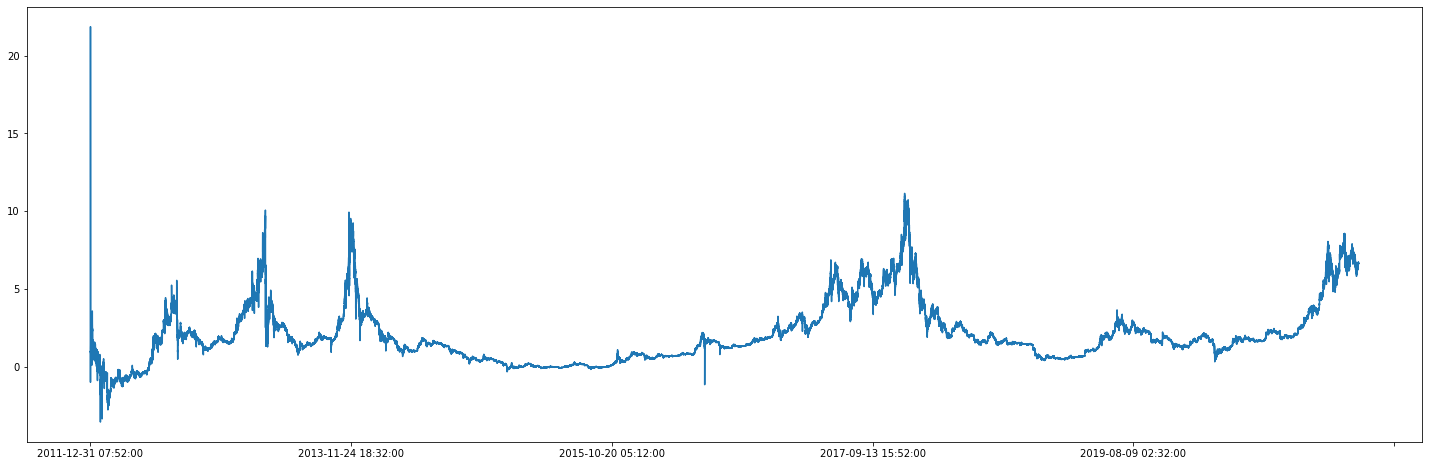

In [19]:
plt.figure(figsize=(25,8))
btc_df['Z-score'].plot()

### 초기, 중간 이상치 수정

In [20]:
btc_df.loc['2011-12-31 15:50:00':'2012-01-01 04:17:00']['Z-score'] = np.nan

<ipython-input-20-c0f3f5b22c8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_df.loc['2011-12-31 15:50:00':'2012-01-01 04:17:00']['Z-score'] = np.nan


In [21]:
btc_df.interpolate(limit_direction="backward", inplace=True)

<AxesSubplot:>

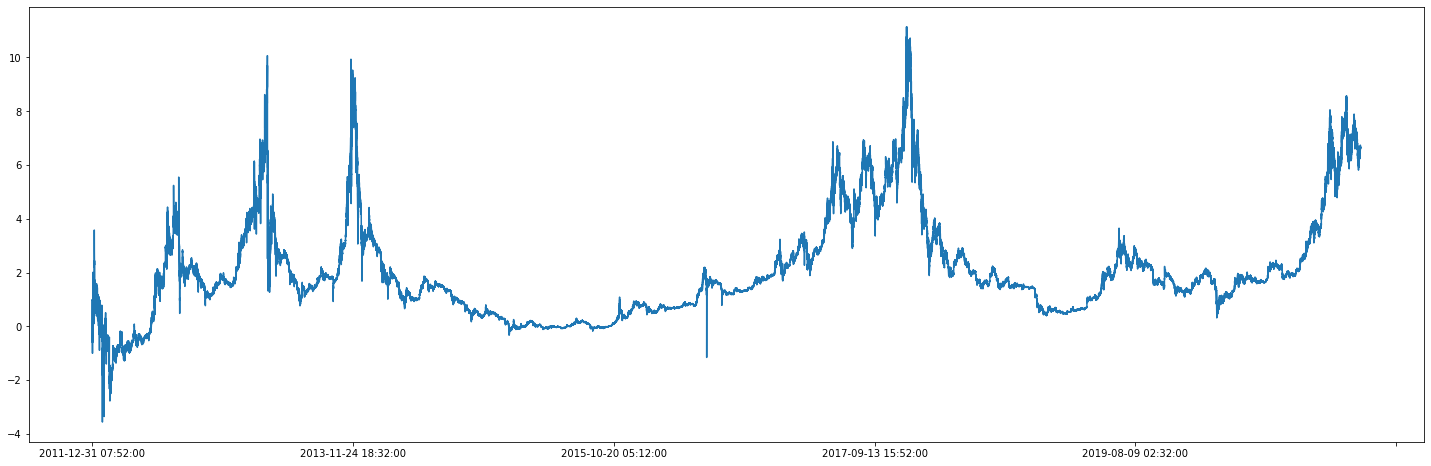

In [22]:
plt.figure(figsize=(25,8))
btc_df['Z-score'].plot()

In [23]:
btc_df.loc['2016-06-23 12:36:00']['Z-score'] = 1.3602395

<AxesSubplot:>

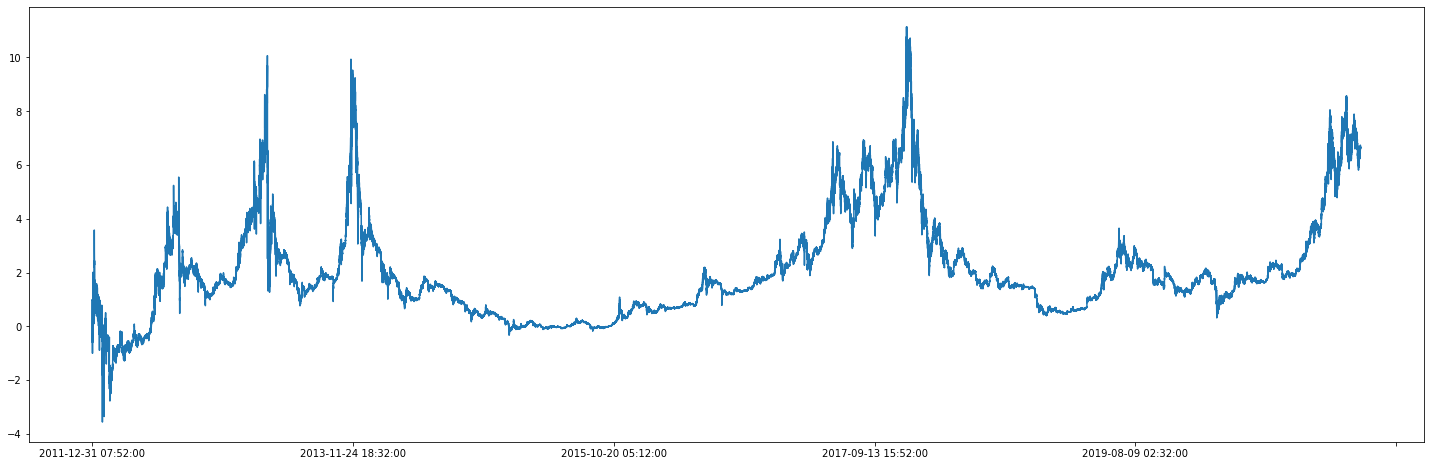

In [24]:
plt.figure(figsize=(25,8))
btc_df['Z-score'].plot()

<AxesSubplot:label='c70a6360-eb80-42a7-9ff3-e45c7131994a'>

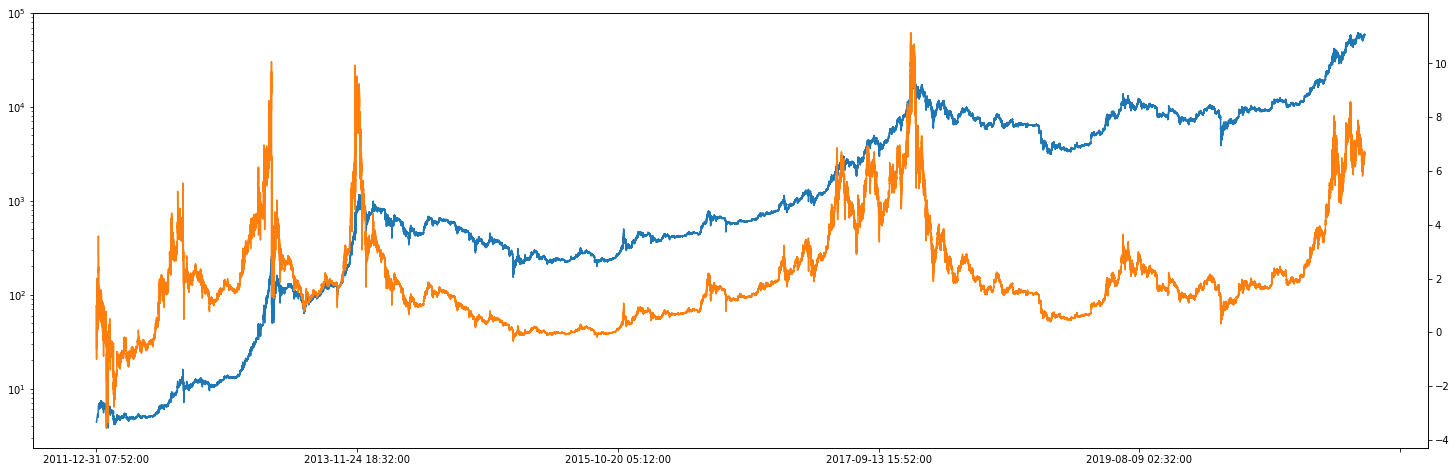

In [25]:
plt.figure(figsize=(25,8))
ax = btc_df['Close'].plot()
ax.set_yscale("log")
btc_df['Z-score'].plot(secondary_y=True, ax=ax)

## 이동평균선 그래프

### 5분 지수이동평균

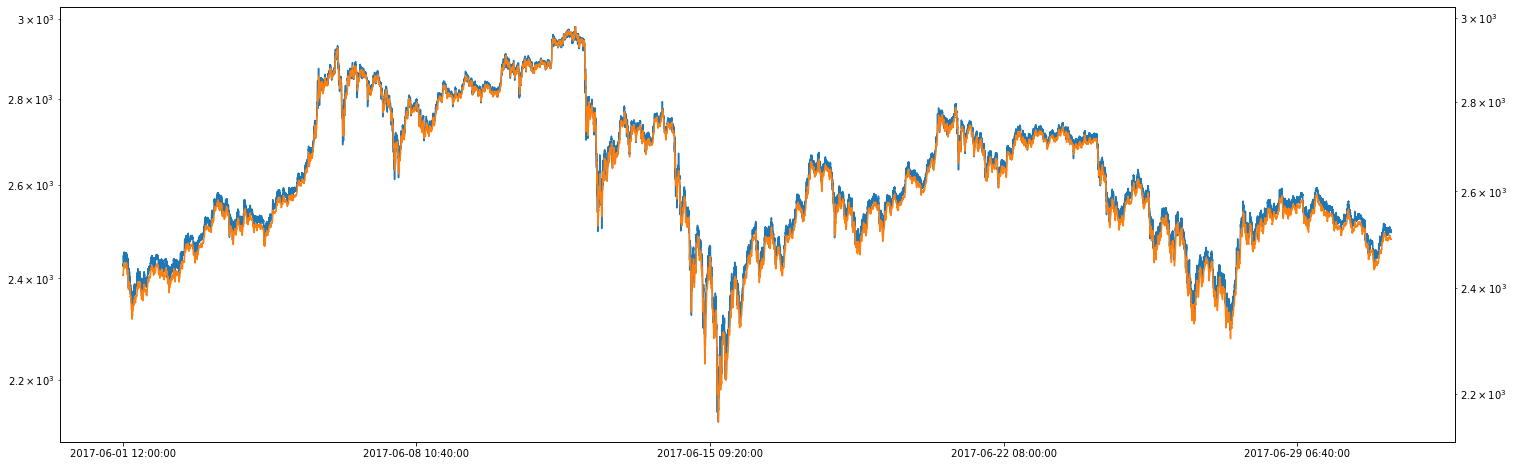

In [26]:
plt.figure(figsize=(25,8))
range_df = btc_df.loc['2017-06-01 12:00:00' : '2017-07-01 12:00:00']
ax = range_df['Close'].plot()
ax.set_yscale("log")
ax2 = range_df['ema5m'].plot(secondary_y=True, ax=ax)
ax2.set_yscale("log")

### 30분 지수이동평균

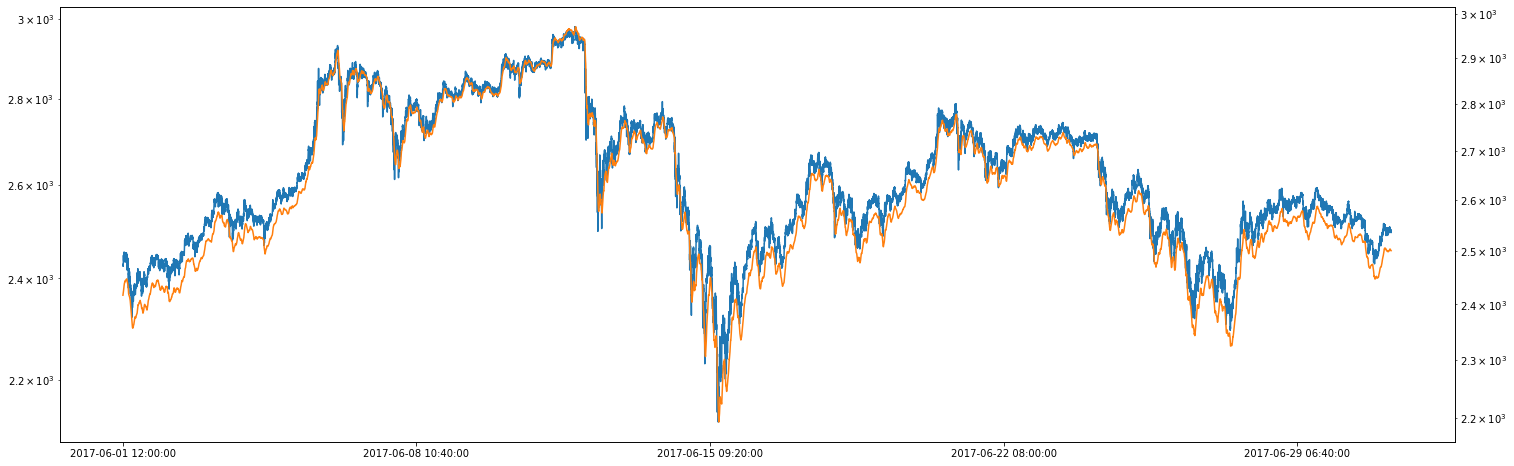

In [27]:
plt.figure(figsize=(25,8))
range_df = btc_df.loc['2017-06-01 12:00:00' : '2017-07-01 12:00:00']
ax = range_df['Close'].plot()
ax.set_yscale("log")
ax2 = range_df['ema30m'].plot(secondary_y=True, ax=ax)
ax2.set_yscale("log")

### 60분 지수이동평균

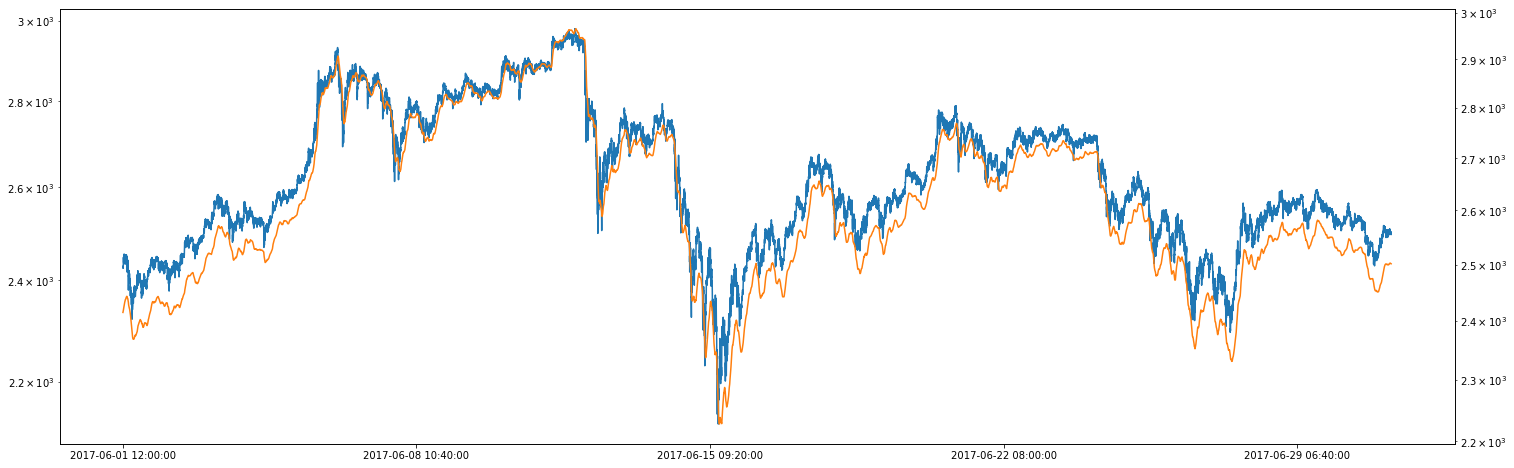

In [28]:
plt.figure(figsize=(25,8))
range_df = btc_df.loc['2017-06-01 12:00:00' : '2017-07-01 12:00:00']
ax = range_df['Close'].plot()
ax.set_yscale("log")
ax2 = range_df['ema60m'].plot(secondary_y=True, ax=ax)
ax2.set_yscale("log")

### 1일 지수이동평균

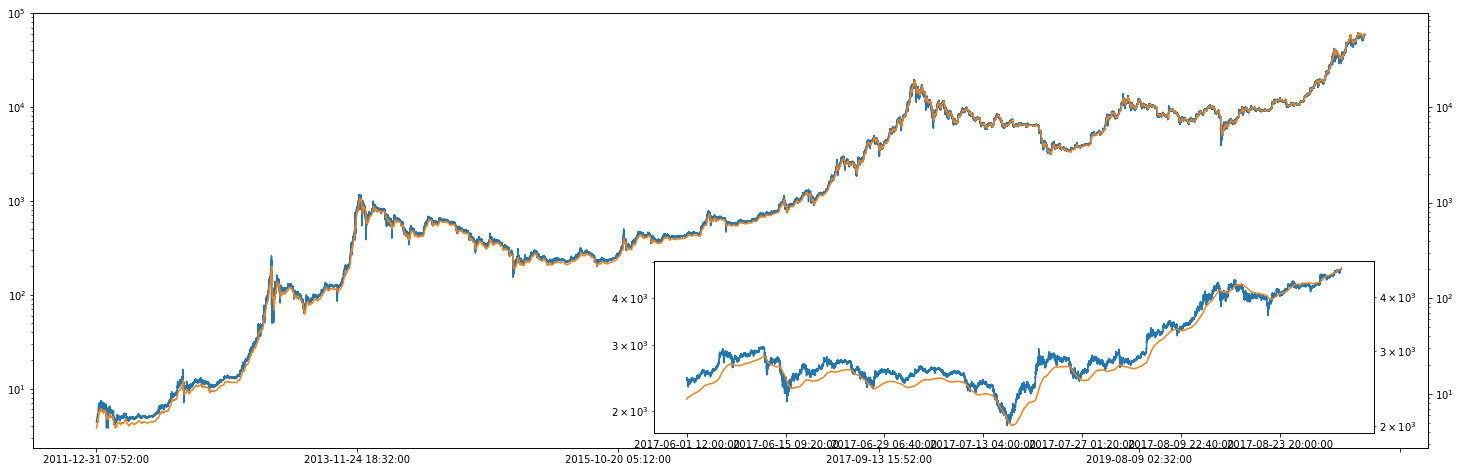

In [82]:
plt.figure(figsize=(25,8))
ax = btc_df['Close'].plot()
ax.set_yscale("log")
ax2 = btc_df['ema1d'].plot(secondary_y=True, ax=ax)
ax2.set_yscale("log")

ax3 = plt.axes([0.47, 0.15, 0.4, 0.3])
range_df = btc_df.loc['2017-06-01 12:00:00' : '2017-09-01 12:00:00']
ax3 = range_df['Close'].plot()
ax3.set_yscale("log")
ax4 = range_df['ema1d'].plot(secondary_y=True, ax=ax3)
ax4.set_yscale("log")

### 3일 지수이동평균

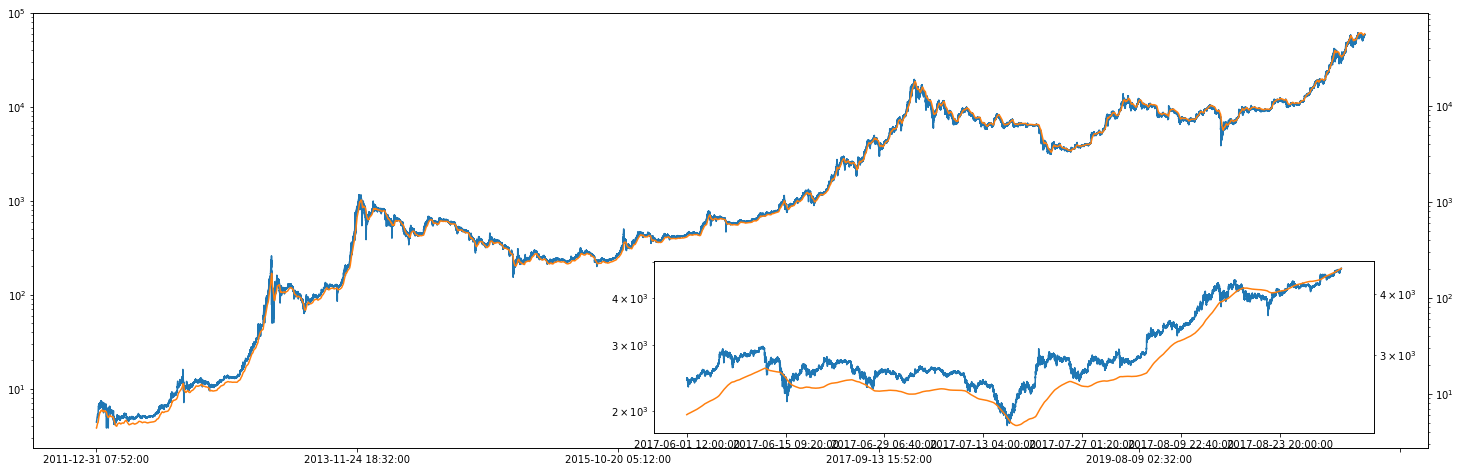

In [83]:
plt.figure(figsize=(25,8))
ax = btc_df['Close'].plot()
ax.set_yscale("log")
ax2 = btc_df['ema3d'].plot(secondary_y=True, ax=ax)
ax2.set_yscale("log")

ax3 = plt.axes([0.47, 0.15, 0.4, 0.3])
range_df = btc_df.loc['2017-06-01 12:00:00' : '2017-09-01 12:00:00']
ax3 = range_df['Close'].plot()
ax3.set_yscale("log")
ax4 = range_df['ema3d'].plot(secondary_y=True, ax=ax3)
ax4.set_yscale("log")

### 7일 단순이동평균

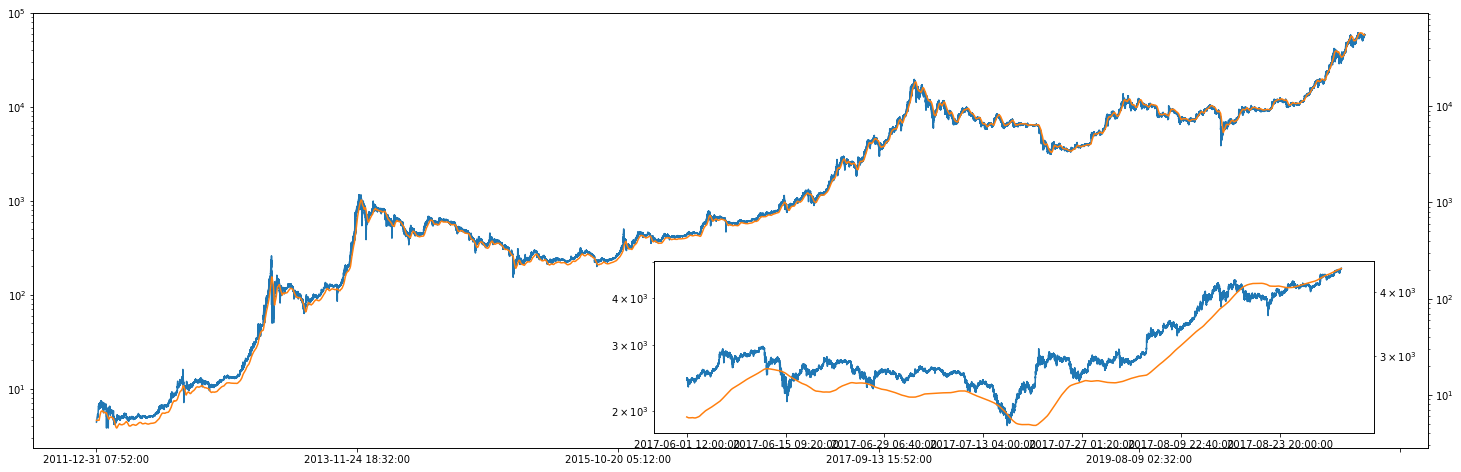

In [84]:
fig = plt.figure(figsize=(25,8))
ax = btc_df['Close'].plot()
ax.set_yscale("log")
ax2 = btc_df['sma7d'].plot(secondary_y=True, ax=ax)
ax2.set_yscale("log")

ax3 = plt.axes([0.47, 0.15, 0.4, 0.3])
range_df = btc_df.loc['2017-06-01 12:00:00' : '2017-09-01 12:00:00']
ax3 = range_df['Close'].plot()
ax3.set_yscale("log")
ax4 = range_df['sma7d'].plot(secondary_y=True, ax=ax3)
ax4.set_yscale("log")

### 30일 단순이동평균

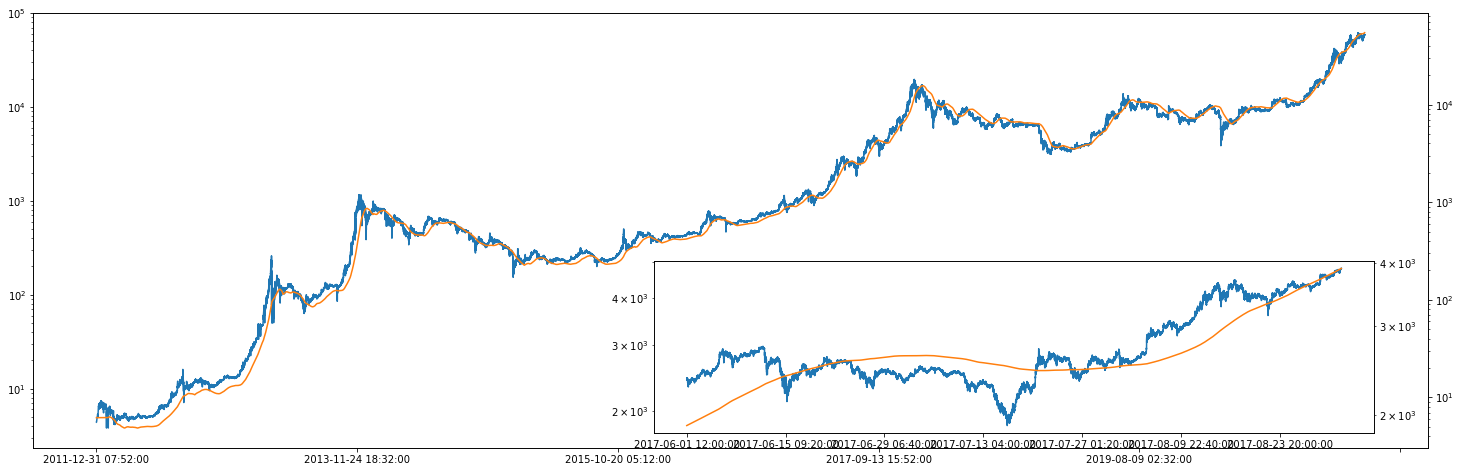

In [85]:
plt.figure(figsize=(25,8))
ax = btc_df['Close'].plot()
ax.set_yscale("log")
ax2 = btc_df['sma30d'].plot(secondary_y=True, ax=ax)
ax2.set_yscale("log")

ax3 = plt.axes([0.47, 0.15, 0.4, 0.3])
range_df = btc_df.loc['2017-06-01 12:00:00' : '2017-09-01 12:00:00']
ax3 = range_df['Close'].plot()
ax3.set_yscale("log")
ax4 = range_df['sma30d'].plot(secondary_y=True, ax=ax3)
ax4.set_yscale("log")

### 90일 단순이동평균

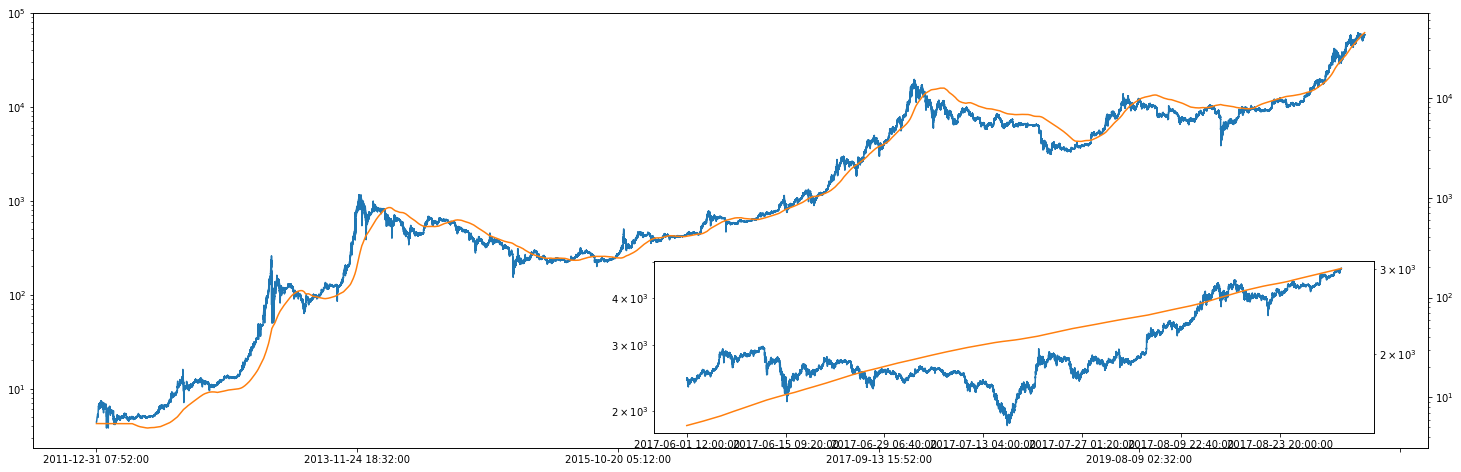

In [93]:
plt.figure(figsize=(25,8))
ax = btc_df['Close'].plot()
ax.set_yscale("log")
ax2 = btc_df['sma90d'].plot(secondary_y=True, ax=ax)
ax2.set_yscale("log")

ax3 = plt.axes([0.47, 0.15, 0.4, 0.3])
range_df = btc_df.loc['2017-06-01 12:00:00' : '2017-09-01 12:00:00']
ax3 = range_df['Close'].plot()
ax3.set_yscale("log")
ax4 = range_df['sma90d'].plot(secondary_y=True, ax=ax3)
ax4.set_yscale("log")

### 180일 단순이동평균

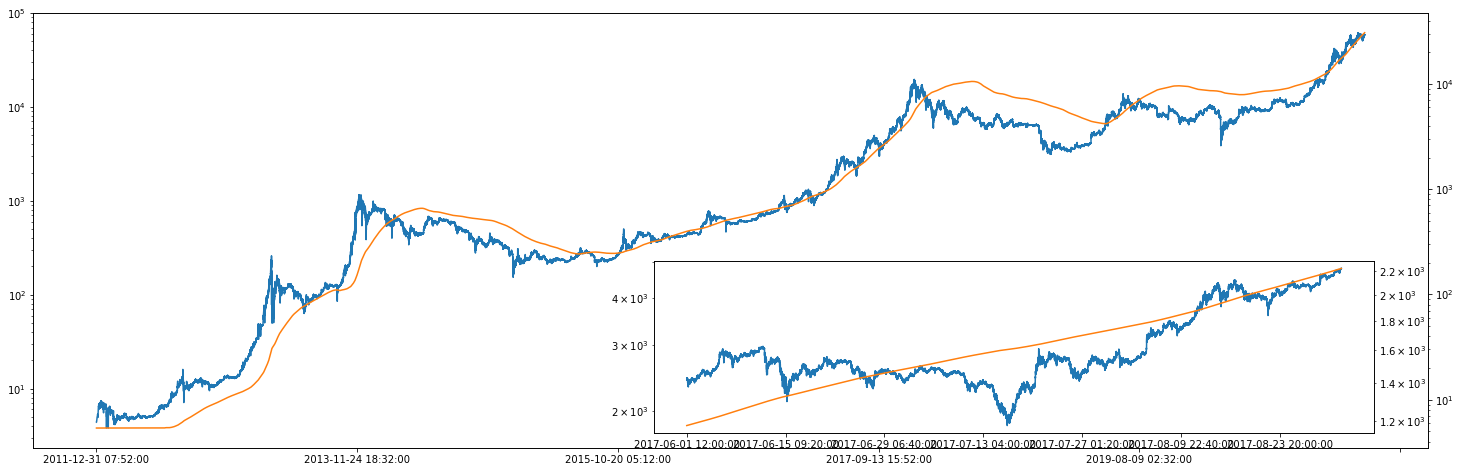

In [94]:
plt.figure(figsize=(25,8))
ax = btc_df['Close'].plot()
ax.set_yscale("log")
ax2 = btc_df['sma180d'].plot(secondary_y=True, ax=ax)
ax2.set_yscale("log")

ax3 = plt.axes([0.47, 0.15, 0.4, 0.3])
range_df = btc_df.loc['2017-06-01 12:00:00' : '2017-09-01 12:00:00']
ax3 = range_df['Close'].plot()
ax3.set_yscale("log")
ax4 = range_df['sma180d'].plot(secondary_y=True, ax=ax3)
ax4.set_yscale("log")

### 이동평균 최종

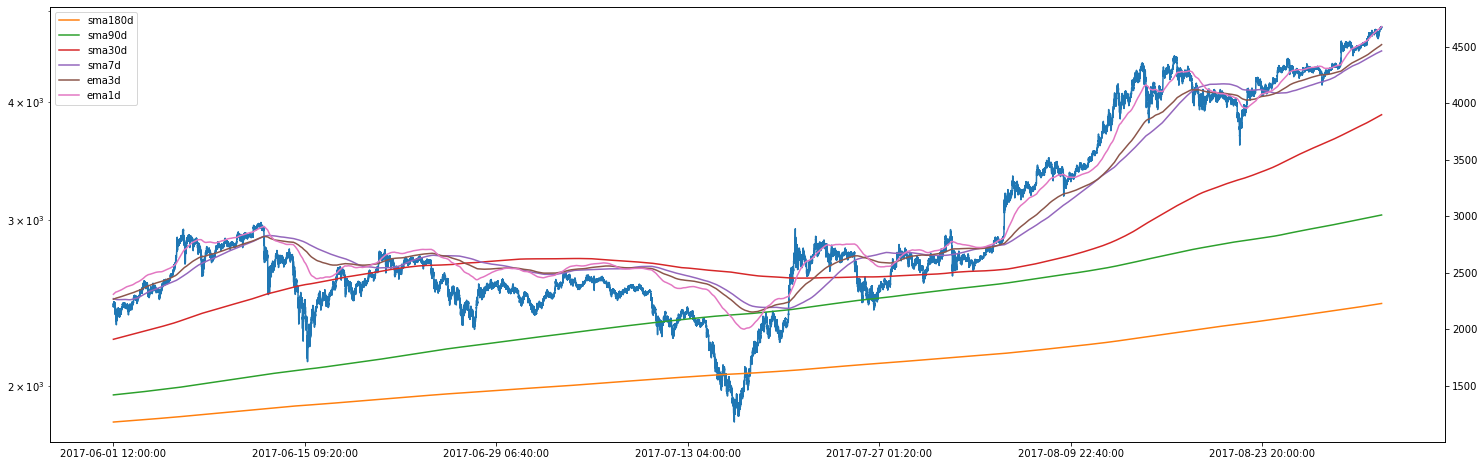

In [95]:
plt.figure(figsize=(25,8))
range_df = btc_df.loc['2017-06-01 12:00:00' : '2017-09-01 12:00:00']
ax = range_df['Close'].plot(label='Close')
ax.set_yscale("log")
range_df['sma180d'].plot(secondary_y=True, ax=ax, label='sma180d')
range_df['sma90d'].plot(secondary_y=True, ax=ax, label='sma90d')
range_df['sma30d'].plot(secondary_y=True, ax=ax, label='sma30d')
range_df['sma7d'].plot(secondary_y=True, ax=ax, label='sma7d')
range_df['ema3d'].plot(secondary_y=True, ax=ax, label='ema3d')
range_df['ema1d'].plot(secondary_y=True, ax=ax, label='ema1d')
# range_df['ema60m'].plot(secondary_y=True, ax=ax, label='ema60m')
# range_df['ema30m'].plot(secondary_y=True, ax=ax, label='ema30m')
# range_df['ema5m'].plot(secondary_y=True, ax=ax, label='ema5m')
plt.legend()

## 외부 데이터

In [123]:
display_side_by_side(djia.head(), hash_rate.head(), mining_dif.head(), wti_oil.head())

종가 
 오픈 
 고가 
 저가 
 거래량 
 변동 % 
 
 
 날짜 
 
 
 
 
 
 
 
 
 
 
 2012-01-03 
 12,397.38 
 12,221.19 
 12,479.65 
 12,221.19 
 152.56M 
 1.47% 
 
 
 2012-01-04 
 12,418.42 
 12,392.46 
 12,430.00 
 12,337.25 
 145.13M 
 0.17% 
 
 
 2012-01-05 
 12,415.70 
 12,418.42 
 12,435.98 
 12,283.90 
 158.44M 
 -0.02% 
 
 
 2012-01-06 
 12,359.92 
 12,407.45 
 12,415.24 
 12,332.41 
 131.12M 
 -0.45% 
 
 
 2012-01-09 
 12,392.69 
 12,359.31 
 12,409.08 
 12,333.85 
 122.20M 
 0.27% 
 
 
 
 
 
 
 hash-rate 
 
 
 Timestamp 
 
 
 
 
 
 2009-01-03 
 4.971027e-08 
 
 
 2009-01-06 
 0.000000e+00 
 
 
 2009-01-09 
 6.959438e-07 
 
 
 2009-01-12 
 4.424214e-06 
 
 
 2009-01-15 
 6.313204e-06 
 
 
 
 
 
 
 difficulty 
 
 
 Timestamp 
 
 
 
 
 
 2009-01-03 
 1.0 
 
 
 2009-01-06 
 0.0 
 
 
 2009-01-09 
 1.0 
 
 
 2009-01-12 
 1.0 
 
 
 2009-01-15 
 1.0 
 
 
 
 
 
 
 종가 
 오픈 
 고가 
 저가 
 거래량 
 변동 % 
 
 
 날짜 
 
 
 
 
 
 
 
 
 
 
 2012-01-03 
 102.96 
 99.70 
 103.18 
 99.65 
 275.48K 
 4.18% 
 
 
 2012-01-04 
 103.22 
 102.99 
 103.74 
 101.88 
 271.71K 
 0.25% 
 
 
 2012-01-05 
 101.81 
 103.29 
 103.73 
 101.30 
 295.62K 
 -1.37% 
 
 
 2012-01-06 
 101.56 
 101.35 
 102.80 
 100.88 
 290.46K 
 -0.25% 
 
 
 2012-01-09 
 101.31 
 101.92 
 102.15 
 100.10 
 311.87K 
 -0.25%

In [125]:
djia['종가'] = djia['종가'].apply(lambda x:np.float32(x.replace(',','')))
djia

,종가,오픈,고가,저가,거래량,변동 %
날짜,,,,,,
2012-01-03,12397.379883,"12,221.19","12,479.65","12,221.19",152.56M,1.47%
2012-01-04,12418.419922,"12,392.46","12,430.00","12,337.25",145.13M,0.17%
2012-01-05,12415.700195,"12,418.42","12,435.98","12,283.90",158.44M,-0.02%
2012-01-06,12359.919922,"12,407.45","12,415.24","12,332.41",131.12M,-0.45%
2012-01-09,12392.690430,"12,359.31","12,409.08","12,333.85",122.20M,0.27%
...,...,...,...,...,...,...
2021-03-25,32619.480469,"32,346.81","32,672.69","32,071.41",413.49M,0.62%
2021-03-26,33072.878906,"32,681.07","33,098.83","32,681.07",383.45M,1.39%
2021-03-29,33171.371094,"33,087.55","33,259.00","32,905.13",351.61M,0.30%


C:\Users\saeji\anaconda3\envs\tensorflow2.3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\saeji\anaconda3\envs\tensorflow2.3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\saeji\anaconda3\envs\tensorflow2.3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\saeji\anaconda3\envs\tensorflow2.3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)


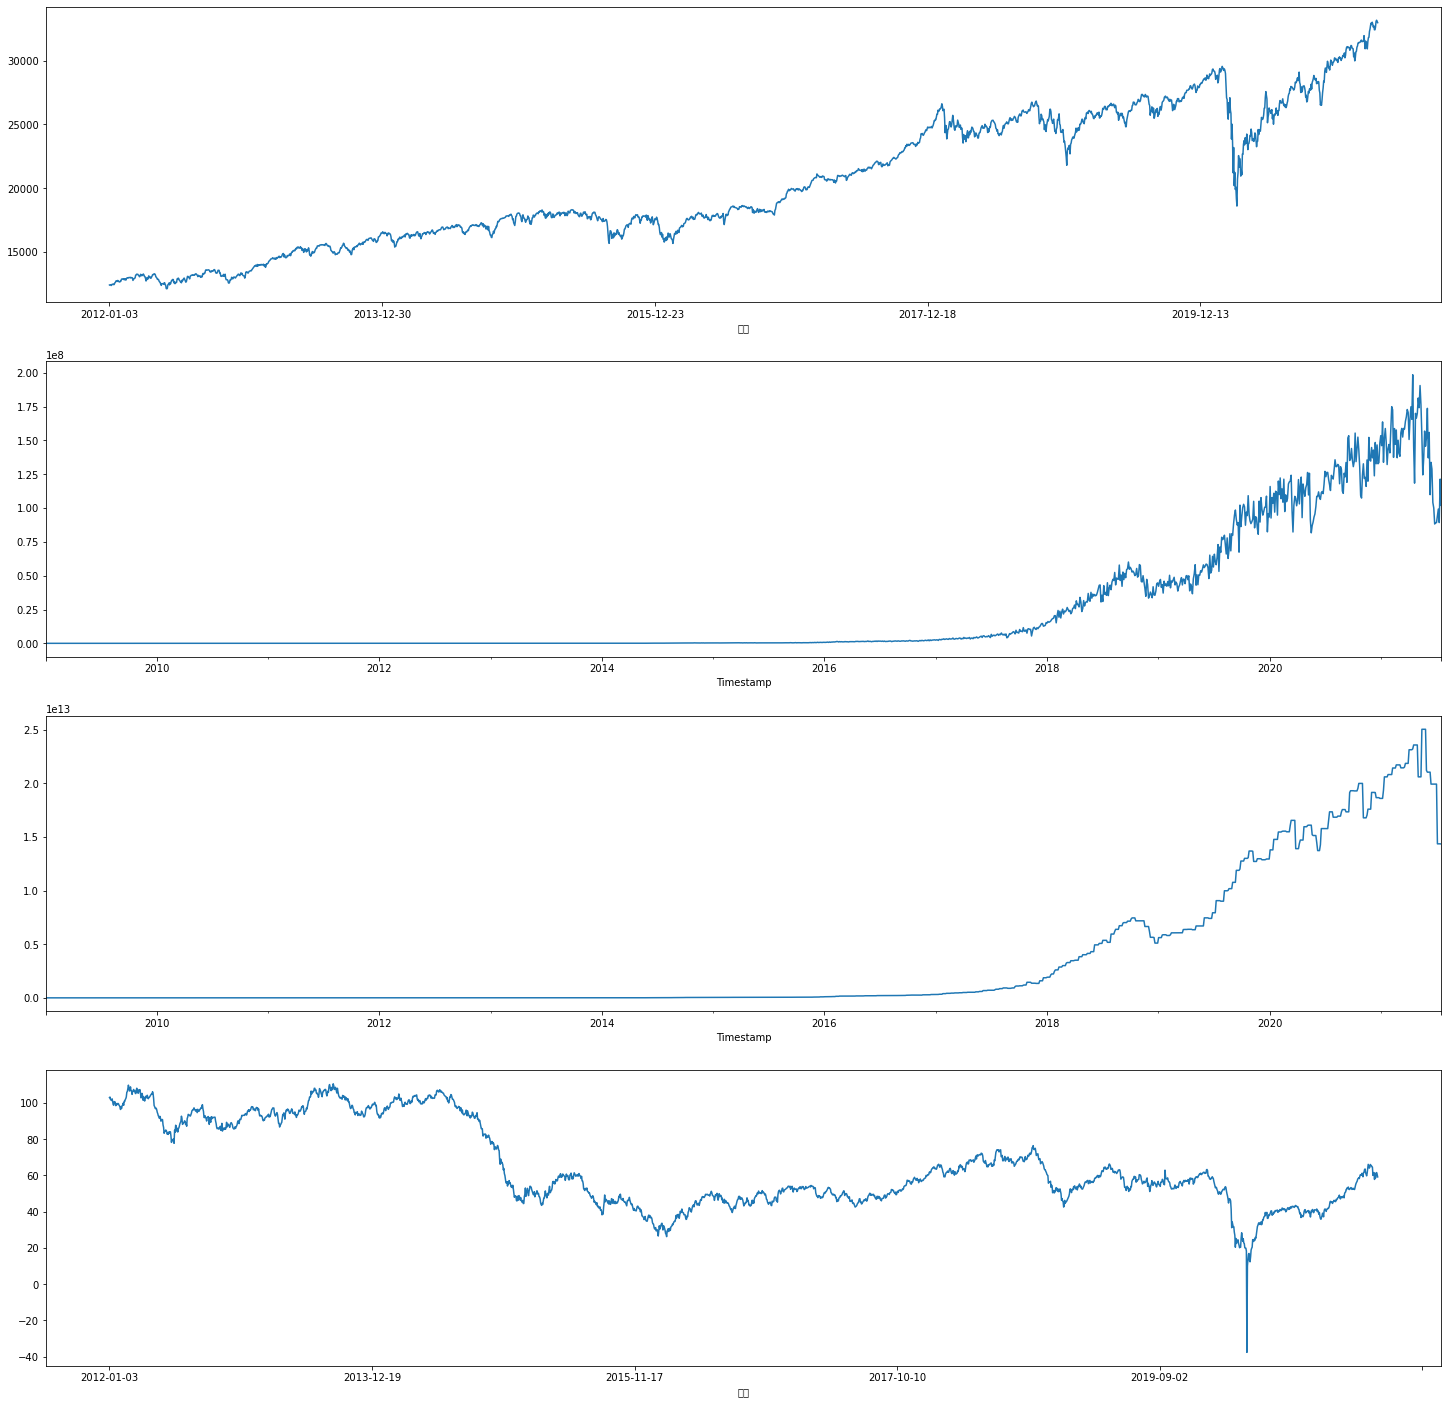

In [165]:
plt.figure(figsize=(25,25))
plt.subplot(411)
djia['종가'].plot()
plt.subplot(412)
hash_rate['hash-rate'].plot()
plt.subplot(413)
mining_dif['difficulty'].plot()
plt.subplot(414)
wti_oil['종가'].plot();

# 최종 데이터 저장

In [ ]:
DATA_VERSION = 2

## 모든 feature 사용

In [167]:
btc_df.to_csv("data/BTC_2012_2021_v{}.csv".format(DATA_VERSION))

## 단기 이동평균선(EMA 5분 30분 60분 1일) 제거 - DATA version 3

In [155]:
btc_df.drop(['ema5m', 'ema30m', 'ema60m'], axis=1).to_csv("BTC_2012_2021_v3.csv")